In [19]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Step 2: Load Dataset
df = pd.read_csv("ecommerce_data.csv")
print("First 5 rows of dataset:\n", df.head())

First 5 rows of dataset:
   Order_ID Customer_ID     Product     Category  Price  Quantity  Discount  \
0    O1001        C101      Laptop  Electronics    850         2        10   
1    O1002        C102  Smartphone  Electronics    600         1        15   
2    O1003        C103  Headphones  Electronics    120         3        20   
3    O1004        C104     T-shirt     Clothing     25         2         0   
4    O1005        C105       Shoes     Clothing     80         1         5   

   Rating Order_Date Region Return  
0       4   1/5/2025  North     No  
1       5  1/12/2025  South     No  
2       3  1/18/2025   East    Yes  
3       4   1/7/2025   West     No  
4       5  1/20/2025  North     No  


In [23]:
# Step 3: Basic Overview
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values Check:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order_ID     50 non-null     object
 1   Customer_ID  50 non-null     object
 2   Product      50 non-null     object
 3   Category     50 non-null     object
 4   Price        50 non-null     int64 
 5   Quantity     50 non-null     int64 
 6   Discount     50 non-null     int64 
 7   Rating       50 non-null     int64 
 8   Order_Date   50 non-null     object
 9   Region       50 non-null     object
 10  Return       50 non-null     object
dtypes: int64(4), object(7)
memory usage: 4.4+ KB
None

Summary Statistics:
             Price   Quantity   Discount     Rating
count    50.000000  50.000000  50.000000  50.000000
mean    388.600000   1.500000  13.100000   4.240000
std     370.621321   0.646813   8.199676   0.822143
min      25.000000   1.000000   0.000000   2.000000
25%      81.2

In [25]:
# Step 4: Add Total Sales Column
df['Total_Sales'] = df['Price'] * df['Quantity']


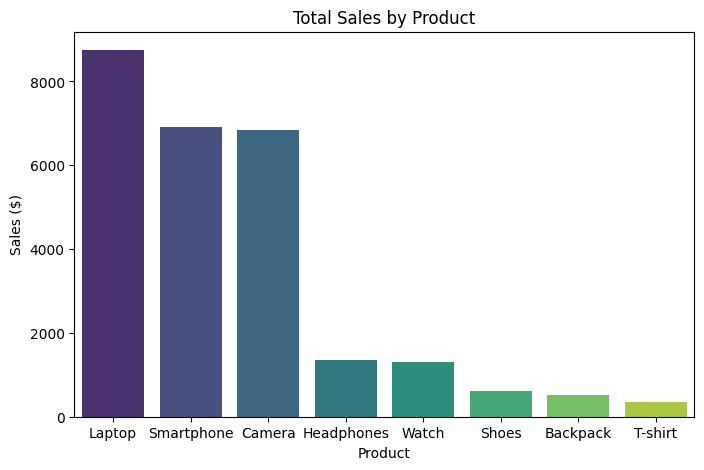

In [27]:
# Step 5: Product Performance
product_sales = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)
product_sales_df = product_sales.reset_index()
product_sales_df.columns = ['Product', 'Total_Sales']

plt.figure(figsize=(8,5))
sns.barplot(
    data=product_sales_df,
    x='Product',
    y='Total_Sales',
    hue='Product',  # ensures palette works
    dodge=False,
    palette='viridis',
    legend=False
)
plt.title("Total Sales by Product")
plt.ylabel("Sales ($)")
plt.xlabel("Product")
plt.show()

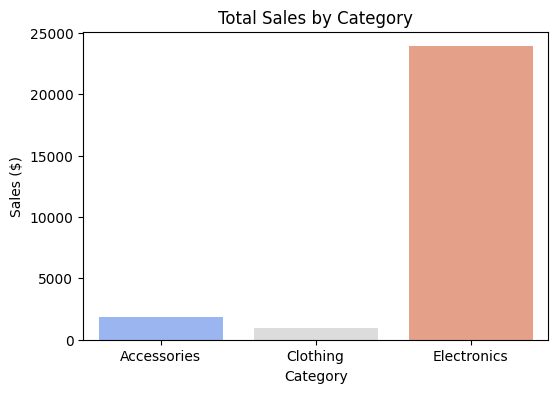

In [29]:
# Step 6: Category Performance
category_sales = df.groupby('Category')['Total_Sales'].sum()
category_sales_df = category_sales.reset_index()
category_sales_df.columns = ['Category', 'Total_Sales']

plt.figure(figsize=(6,4))
sns.barplot(
    data=category_sales_df,
    x='Category',
    y='Total_Sales',
    hue='Category',  # ensures palette works
    dodge=False,
    palette='coolwarm',
    legend=False
)
plt.title("Total Sales by Category")
plt.ylabel("Sales ($)")
plt.xlabel("Category")
plt.show()

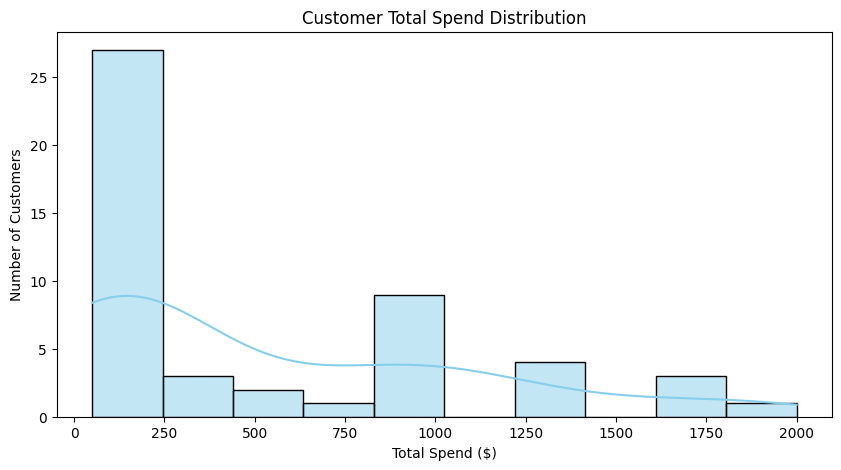

In [31]:
# Step 7: Customer Spend Distribution
customer_spend = df.groupby('Customer_ID')['Total_Sales'].sum()

plt.figure(figsize=(10,5))
sns.histplot(customer_spend, bins=10, kde=True, color='skyblue')
plt.title("Customer Total Spend Distribution")
plt.xlabel("Total Spend ($)")
plt.ylabel("Number of Customers")
plt.show()


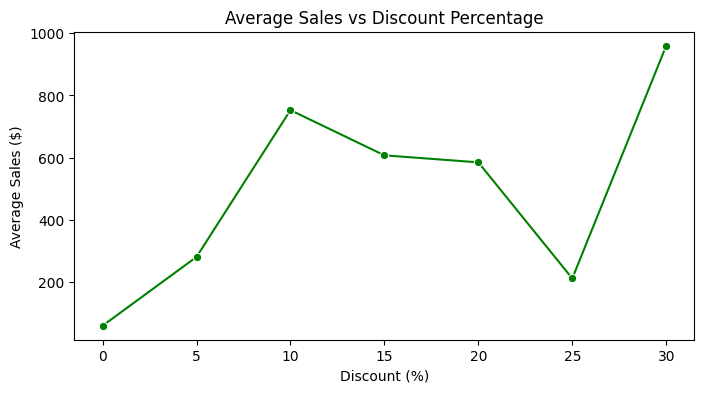

In [33]:
# Step 8: Discount vs Sales
discount_sales = df.groupby('Discount')['Total_Sales'].mean()

plt.figure(figsize=(8,4))
sns.lineplot(
    x=discount_sales.index,
    y=discount_sales.values,
    marker='o',
    color='green'
)
plt.title("Average Sales vs Discount Percentage")
plt.xlabel("Discount (%)")
plt.ylabel("Average Sales ($)")
plt.show()

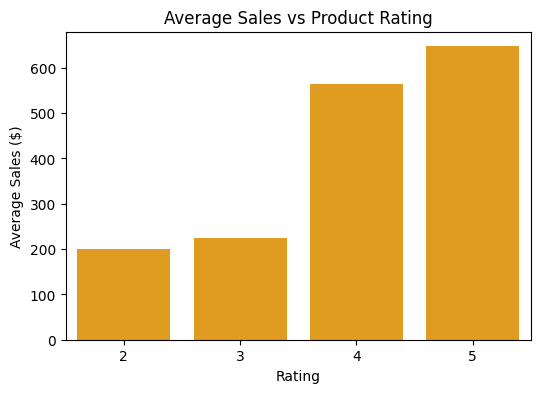

In [35]:
# Step 9: Rating vs Sales
rating_sales = df.groupby('Rating')['Total_Sales'].mean()

plt.figure(figsize=(6,4))
sns.barplot(
    x=rating_sales.index,
    y=rating_sales.values,
    color='orange'
)
plt.title("Average Sales vs Product Rating")
plt.xlabel("Rating")
plt.ylabel("Average Sales ($)")
plt.show()

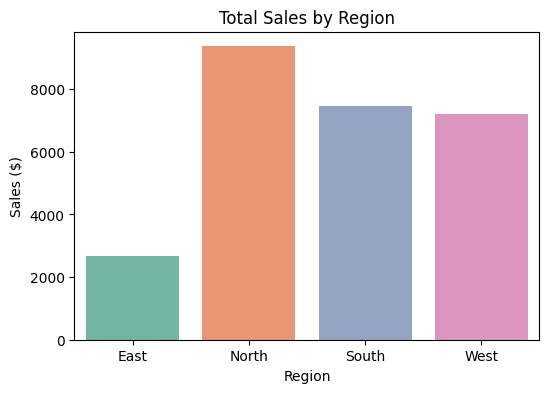

In [37]:
# Step 10: Regional Sales Analysis
region_sales = df.groupby('Region')['Total_Sales'].sum()
region_sales_df = region_sales.reset_index()
region_sales_df.columns = ['Region', 'Total_Sales']

plt.figure(figsize=(6,4))
sns.barplot(
    data=region_sales_df,
    x='Region',
    y='Total_Sales',
    hue='Region',
    dodge=False,
    palette='Set2',
    legend=False
)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales ($)")
plt.show()


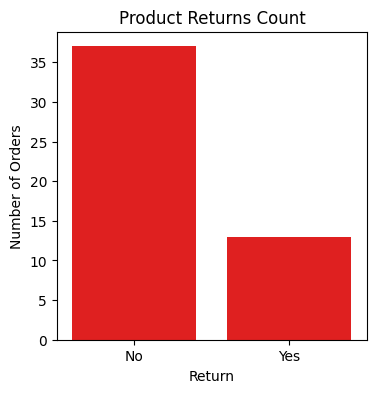

In [39]:
# Step 11: Product Returns Analysis
return_counts = df['Return'].value_counts()

plt.figure(figsize=(4,4))
sns.barplot(
    x=return_counts.index,
    y=return_counts.values,
    color='red'
)
plt.title("Product Returns Count")
plt.ylabel("Number of Orders")
plt.show()